In [2]:
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import damask
from orix import plot, sampling
from orix.crystal_map import Phase  
from orix.quaternion import Orientation, symmetry
from orix.vector import Vector3d

In [12]:
new_params = {
    "figure.facecolor": "w",
    "figure.figsize": (20, 7),
    "lines.markersize": 10,
    "font.size": 15,
    "axes.grid": True,
}
plt.rcParams.update(new_params)

In [13]:
result_20grains = 'results/20/20_32x32x32_pc_vor_tension2.5.hdf5'
result_2000grains = 'results/200/2000_32x32x32_pc_vor_tension2.5.hdf5'
result_2000grains = 'results/2000/2000_32x32x32_pc_vor_tension2.5.hdf5'

In [33]:
def get_rotation(damask_result_file, increment = 0):
    result = damask.Result(damask_result_file)
    current_increment = result.view(increments=increment)
    return damask.Rotation(current_increment.get('O')).as_Euler_angles()

In [63]:
def generate_ipf(voxel_orientation, direction = "z"):
    if direction == "x":
        direction = Vector3d((1, 0, 0))
    elif direction == "y":
        direction = Vector3d((0, 1, 0))
    elif direction == "z":
        direction = Vector3d((0, 0, 1))
    ori = Orientation.from_euler(voxel_orientation, symmetry.Oh)
    ipfkey = plot.IPFColorKeyTSL(symmetry.Oh, direction)
    rgb_z = ipfkey.orientation2color(ori)
    kwargs = dict(projection="ipf", c=rgb_z, direction=direction)
    ori.scatter(**kwargs)


In [64]:
voxel_orientation = get_rotation(result_20grains, 0)

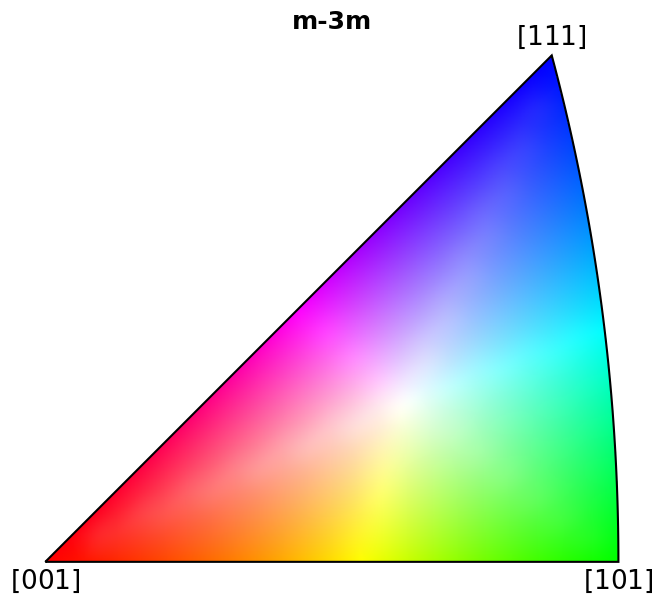

In [65]:
plot.IPFColorKeyTSL(symmetry.Oh).plot()

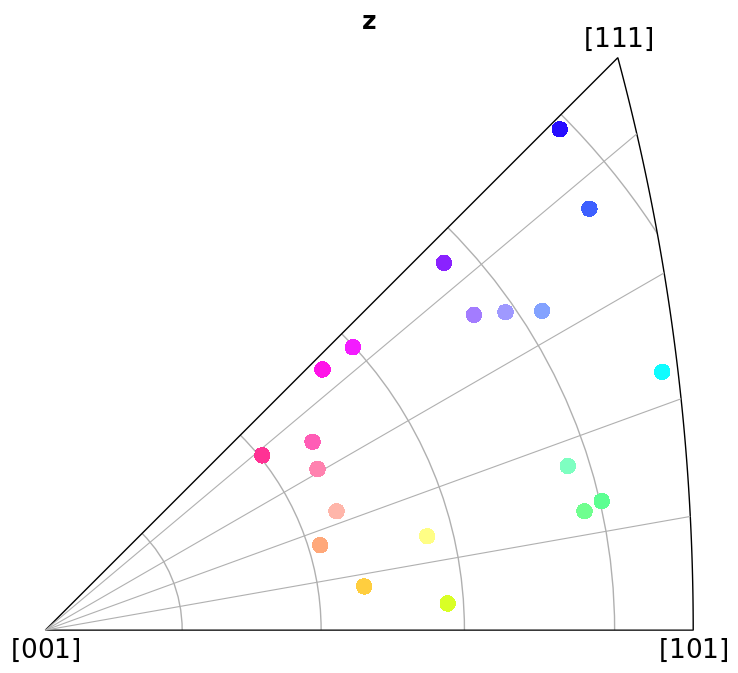

In [73]:
generate_ipf(voxel_orientation, "z")

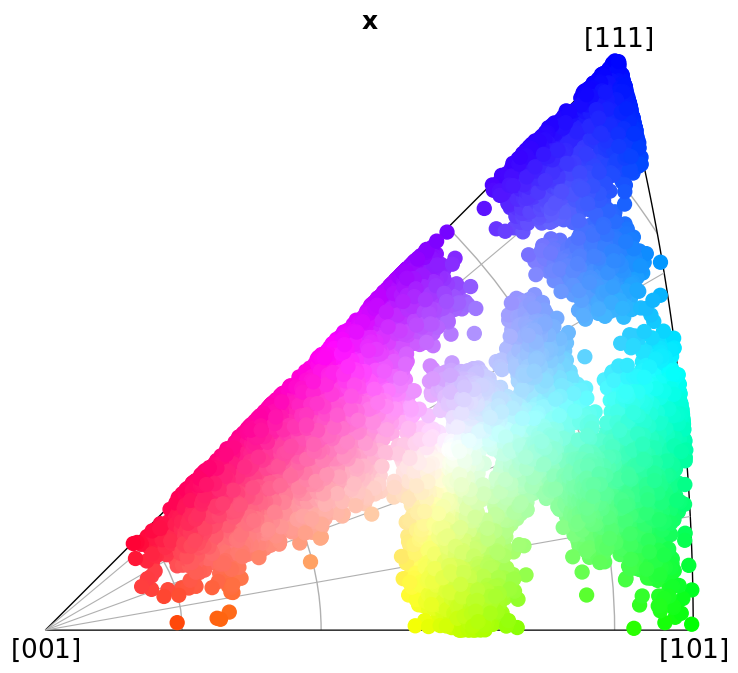

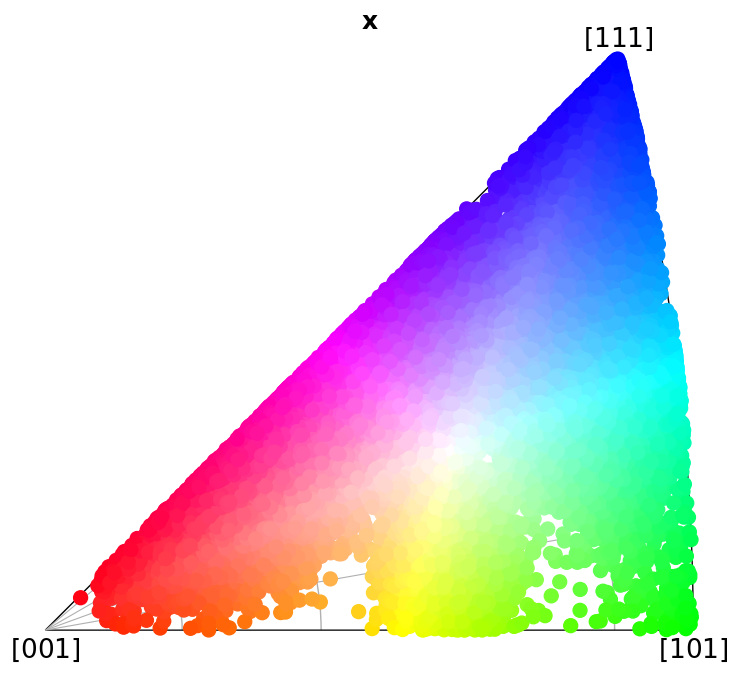

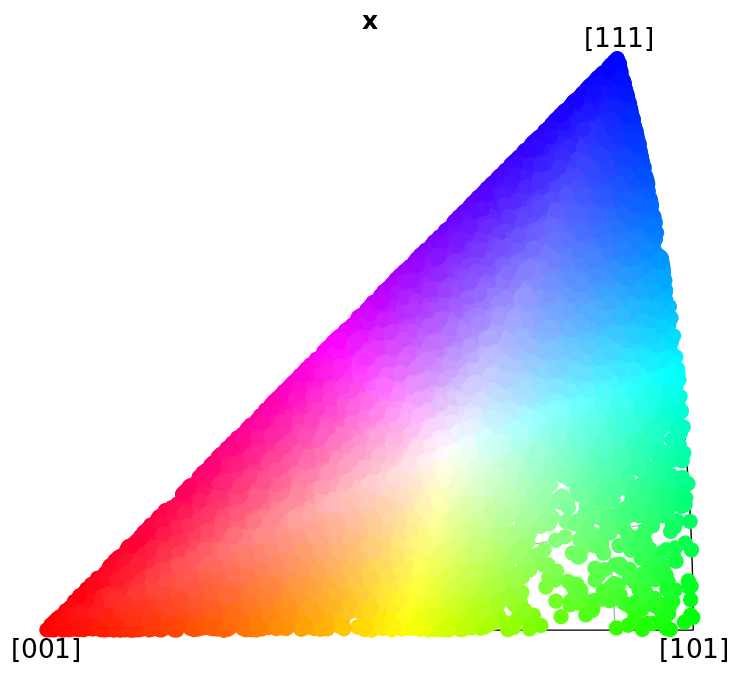

In [79]:
generate_ipf(get_rotation(result_20grains, 5), "x")
generate_ipf(get_rotation(result_20grains, 10), "x")
generate_ipf(get_rotation(result_20grains, 20), "x")

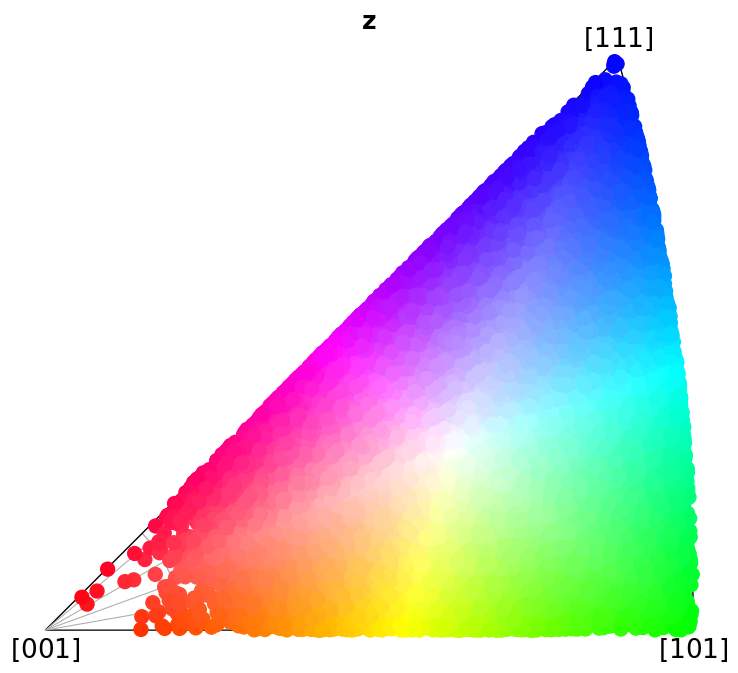

In [76]:
generate_ipf(get_rotation(result_20grains, 20))

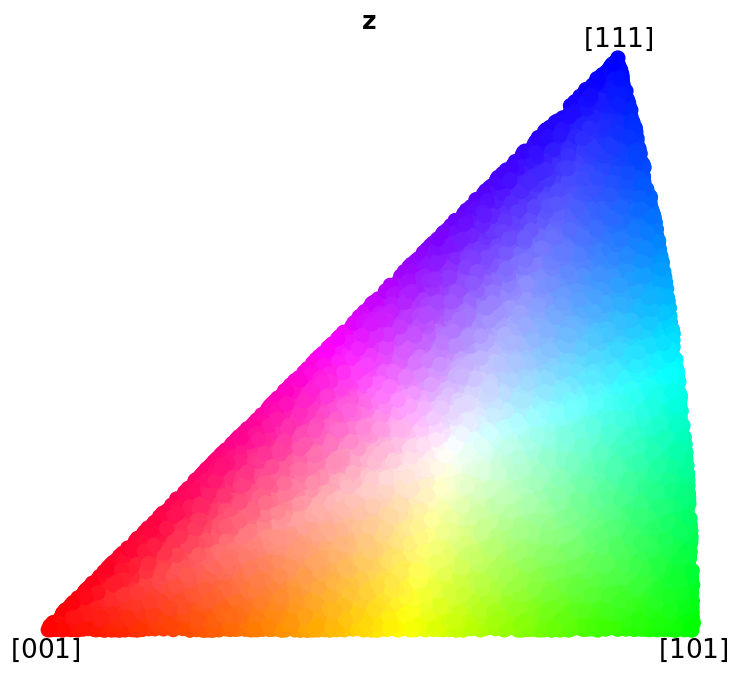

In [83]:
generate_ipf(get_rotation(result_2000grains, 5))